## Colaborative filtering recommender

* User-based: For a user U, with a set of similar users determined based on rating vectors consisting of given item ratings, the rating for an item I, which hasn’t been rated, is found by picking out N users from the similarity list who have rated the item I and calculating the rating based on these N ratings.

* Item-based: For an item I, with a set of similar items determined based on rating vectors consisting of received user ratings, the rating by a user U, who hasn’t rated it, is found by picking out N items from the similarity list that have been rated by U and calculating the rating based on these N ratings.

Item-based collaborative filtering was developed by Amazon. In a system where there are more users than items, item-based filtering is faster and more stable than user-based. It is effective because usually, the average rating received by an item doesn’t change as quickly as the average rating given by a user to different items. It’s also known to perform better than the user-based approach when the ratings matrix is sparse.

(reword)

In [10]:
import pandas as pd
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt

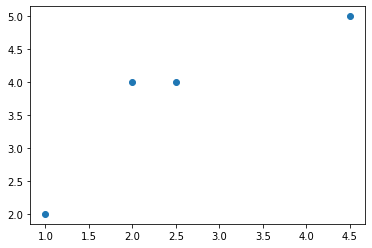

In [11]:
# create a small matrix of 4 users' ratings on 2 movies
# rows are users, columns are ratings 0-5
ratings = np.array([[1,2], [2,4], [2.5,4], [4.5,5]])
plt.scatter(ratings[:,0],ratings[:,1])

In [12]:
# first center each user's ratings to 0 by subtracting avg
ratings_centered = np.subtract(ratings, np.mean(ratings, axis=1).reshape(4,1))
rc = ratings_centered

In [13]:

# use distance to measure similarity
print(spatial.distance.euclidean(rc[0], rc[1]))
print(spatial.distance.euclidean(rc[0], rc[2]))
rc

0.7071067811865476
0.3535533905932738


array([[-0.5 ,  0.5 ],
       [-1.  ,  1.  ],
       [-0.75,  0.75],
       [-0.25,  0.25]])

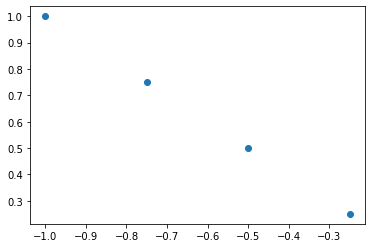

In [14]:
plt.scatter(x=rc[:,0], y=rc[:,1])

In [15]:
# use angle to meausure similarity, 
spatial.distance.cosine(rc[0,:], rc[1,:])
# use angle to meausure similarity, 


0.0

### for user U on item I

1. Find top similar users to U based on their ratings using a similarity distance metric D

2. Find similarity factor S based on how similar the top similar users are to U, using $1-D$. 



2. Predicted rating on item i = the average of the ratings on item i giving by top 5/10 users

\begin{align}
R_U = \frac{\sum_{u=1}^n R_u*S_u}{\sum_{u=1}^nS_u}
\end{align}

In [16]:
from surprise import SVD
from surprise import Dataset
from surprise import Reader

In [17]:
ratings_dict = {
    "item": [1, 2, 1, 2, 1, 2, 1, 2, 1],
    "user": ['A', 'A', 'B', 'B', 'C', 'C', 'D', 'D', 'E'],
    "rating": [1, 2, 2, 4, 2.5, 4, 4.5, 5, 3],
}

In [18]:
df=pd.DataFrame(ratings_dict)
reader = Reader(rating_scale=(1,5))

data = Dataset.load_from_df(df[["user", "item", "rating"]], reader)
# Loads the builtin Movielens-100k data
movielens = Dataset.load_builtin('ml-100k')

Dataset ml-100k could not be found. Do you want to download it? [Y/n] 

 Y


Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /Users/jing/.surprise_data/ml-100k


In [23]:
from surprise import KNNWithMeans

# item-based cosine similarity

sim_options = {"name":"cosine", "user_based":False}
algo = KNNWithMeans(sim_options=sim_options)

In [24]:
train = data.build_full_trainset()
algo.fit(train)

prediction = algo.predict('E', 2)
prediction.est

Computing the cosine similarity matrix...
Done computing similarity matrix.


4.15

### Tuning parameters

In [26]:
from surprise.model_selection import GridSearchCV

In [27]:
data = Dataset.load_builtin("ml-100k")
sim_options = {
    "name": ["msd", "cosine"],
    "min_support": [3, 4, 5],
    "user_based": [False, True],
}

param_grid = {"sim_options": sim_options}

gs = GridSearchCV(KNNWithMeans, param_grid, measures=["rmse", "mae"], cv=3)
gs.fit(data)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [28]:
print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

0.94195276434615
{'sim_options': {'name': 'msd', 'min_support': 3, 'user_based': False}}
